<a href="https://colab.research.google.com/github/corochena/projecteuler/blob/main/pe_61_Cyclical_figurate_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

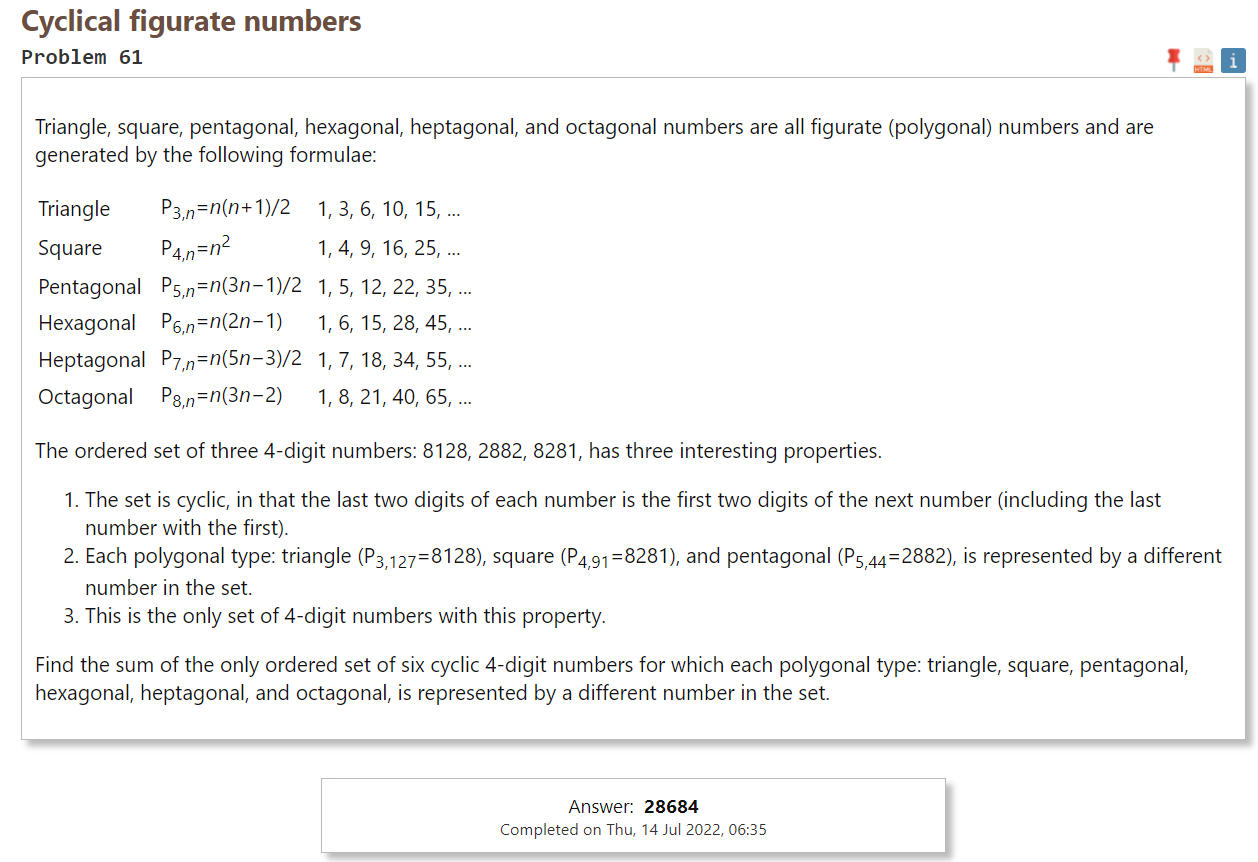

In [1]:
def genPolygonals():
  # returns a list of 4-digit (1000 to 9999) polygonal numbers 
  # triangular, squares, pentagonal, hexagonal and pentagonal

  functions = [lambda n:n*(n+1)/2, lambda n:n**2, lambda n:n*(3*n-1)/2]
  functions += [lambda n:n*(2*n-1), lambda n:n*(5*n-3)/2, lambda n:n*(3*n-2)]

  plists = [[] for f in functions]

  for k,f in enumerate(functions):    
    n = 1
    pnum = 0
    while True:
      pnum = f(n)
      n += 1
      if pnum >= 999 and pnum <= 9999:
        plists[k].append(int(pnum))
      elif pnum > 9999:
        break
  return plists

In [14]:
def uniquechars(l, numchar, izq=True):
  # devuelve un set con los primeros caracteres de la izquierda (o derecha) 
  # de los elementos de una lista
  if izq:
    f = lambda x: str(x)[:numchar]
  else:
    f = lambda x: str(x)[-numchar:]
  return set(list(map(f, l)))

def filtraExtremos(l, setExtremos, numchar, izq=True):
  if izq:
    f = lambda x: str(x)[:numchar] in setExtremos
  else:
    f = lambda x: str(x)[-numchar:] in setExtremos
  return set(filter(f, l))

In [13]:
def filtra1(centro, izq, der):
# devuelve los elementos de la lista centro que se acoplan a las listas de la izq y der
# lo quiero hacer con sets, me pregunto si es mejor con loops y listas
  endizq = uniquechars(izq, 2, izq=False) # ultimos 2 char de lista izq
  centroizq = uniquechars(centro, 2) # primeros 2 char de lista centro
  centroder = uniquechars(centro, 2, izq=False) # ultimos 2 char de lista centro
  begder = uniquechars(der, 2) # primeros 2 char de lista der
  candizq = filtraExtremos(centro, endizq.intersection(centroizq), 2)
  candder = filtraExtremos(centro, begder.intersection(centroder), 2, izq=False)
  return sorted(candizq.intersection(candder))

In [15]:
filtra1([6545,3433,5465,2443],[2343,2565,3423],[4534,6552,5672])

[6545]

In [16]:
# using LISTS 
def allcombo(s):
  if len(s) == 1:
    return [s]
  else:
    elems = sorted([e for e in s])
    combo = []
    for e in elems:
      next = elems[:]
      next.remove(e)
      combo += prefix(e, allcombo(''.join(next)))
    return combo

def prefix(pf, l):
  return [pf + elem for elem in l]

In [45]:
def samelen(l, num):
  for elem in l:
    if len(elem) != num:
      return False
  return True

samelen([[23],[23],[232]],1)

True

In [50]:
def main():
  plists = genPolygonals()
  routes = prefix('0',allcombo('12345')) # all combinations of circular arrangement
  routenum = 0
  for route in routes:
    routenum += 1
    order = [int(n) for n in route] # list of integers from 0 to 5
    candidates = [plists[pos] for pos in order] 
    print('Order #' + str(routenum), order)
    print('Candidates', candidates)
    while True:
      allgood = True
      temp = []
      for i in range(6):
        elem = filtra1(candidates[i], candidates[i-1], candidates[(i+1) % 6])
        temp.append(elem)
        if len(elem) == 0:
          print('Elem len zero', temp)
          allgood = False
          break
      if allgood:
        print('All good',candidates)
        candidates = list(temp)
        if samelen(candidates,1):
          print('Solo 1 candidato, this is the answer')
          print(sum(list(map(lambda l: l[0], candidates))))
          return candidates
      else:
        print('Not all good, try next route\n')
        break

main()


Order #1 [0, 1, 2, 3, 4, 5]
Candidates [[1035, 1081, 1128, 1176, 1225, 1275, 1326, 1378, 1431, 1485, 1540, 1596, 1653, 1711, 1770, 1830, 1891, 1953, 2016, 2080, 2145, 2211, 2278, 2346, 2415, 2485, 2556, 2628, 2701, 2775, 2850, 2926, 3003, 3081, 3160, 3240, 3321, 3403, 3486, 3570, 3655, 3741, 3828, 3916, 4005, 4095, 4186, 4278, 4371, 4465, 4560, 4656, 4753, 4851, 4950, 5050, 5151, 5253, 5356, 5460, 5565, 5671, 5778, 5886, 5995, 6105, 6216, 6328, 6441, 6555, 6670, 6786, 6903, 7021, 7140, 7260, 7381, 7503, 7626, 7750, 7875, 8001, 8128, 8256, 8385, 8515, 8646, 8778, 8911, 9045, 9180, 9316, 9453, 9591, 9730, 9870], [1024, 1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849, 1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916, 3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225, 4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776, 5929, 6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569, 7744, 7921, 8100, 8281, 8464, 8649, 8836, 902

[[8256], [5625], [2512], [1281], [8128], [2882]]

In [35]:
# forma abreviada usando list comprehension
def orderlist(l, order):
  ordered = []
  for pos in order:
    ordered.append(l[pos])
  return ordered

def orderlist2(l, order):
  return [l[pos] for pos in order]

print(orderlist(['a','b','c','d','e'],[4,3,1,0,2]))
print(orderlist2(['a','b','c','d','e'],[4,3,1,0,2]))

['e', 'd', 'b', 'a', 'c']
['e', 'd', 'b', 'a', 'c']
